#**Final Project**


## Project Title:

**Uber Ride Analytics and Operational Insights**

## Purpose and Outcome:




*   **Purpose:** To identify the factors that contribute to completed Uber ride and providing rich insights into booking patterns, vehicle performance, revenue streams, cancellation behaviors, and customer satisfaction metrics.
*   **Outcome:**


*   Be able to predict the likelihood of a ride being completed based on various factors. Enhancing drivers availability and allocation by understanding customer's booking patterns.
*   Give recommendation to achieve better business operation and improve revenue





#About Dataset

## 🚗 National Capital Region of India's Uber Ride Analytics Dataset 2024


Source: https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard

##📊 Dataset Overview


**The dataset captures 150,000 total bookings across multiple vehicle types and provides a complete view of ride-sharing operations including successful rides, cancellations, customer behaviors, and financial metrics.**




##📋 Data Schema


The dataset contains the following columns:

| Column Name | Description |
| :--- | :--- |
| **Date** | Date of the booking |
| **Time** | Time of the booking |
| **Booking ID** | Unique identifier for each ride booking |
| **Booking Status** | Status of booking (Completed, Cancelled by Customer, Cancelled by Driver, etc.) |
| **Customer ID** | Unique identifier for customers |
| **Vehicle Type** | Type of vehicle (Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premier Sedan) |
| **Pickup Location** | Starting location of the ride |
| **Drop Location** | Destination location of the ride |
| **Avg VTAT** | Average time for driver to reach pickup location (in minutes) |
| **Avg CTAT** | Average trip duration from pickup to destination (in minutes) |
| **Cancelled Rides by Customer** | Customer-initiated cancellation flag |
| **Reason for cancelling by Customer** | Reason for customer cancellation |
| **Cancelled Rides by Driver** | Driver-initiated cancellation flag |
| **Driver Cancellation Reason** | Reason for driver cancellation |
| **Incomplete Rides** | Incomplete ride flag |
| **Incomplete Rides Reason** | Reason for incomplete rides |
| **Booking Value** | Total fare amount for the ride |
| **Ride Distance** | Distance covered during the ride (in km) |
| **Driver Ratings** | Rating given to driver (1-5 scale) |
| **Customer Rating** | Rating given by customer (1-5 scale) |
| **Payment Method** | Method used for payment (UPI, Cash, Credit Card, Uber Wallet, Debit Card) |

#Data Analytical Plan

##1.Import needed library

Libraries used for this project:


*   Pandas
*   Maplotlib


*   Seaborn
*   KaggleHub & OS (might load the data directly from Kaggle's source for latest update)




In [ ]:
# Import needed library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

##2.Data import

Import directly from kagglehub

**Download latest version**
```
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")

print("Path to dataset files:", path)
```

Or download dataset CSV file and start to work on it

In [ ]:
# Set path to data source
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")

print("Path to dataset files:", path)

# List files in the dataset directory
print("Files in the dataset directory:", os.listdir(path))

100%|██████████| 16.5M/16.5M [00:00<00:00, 130MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yashdevladdha/uber-ride-analytics-dashboard/versions/2
Files in the dataset directory: ['Dasboard.gif', 'Uber.pbix', 'ncr_ride_bookings.csv']


In [ ]:
# Create file's path
file_path = os.path.join(path, "ncr_ride_bookings.csv")

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

#3. Exploratory Data Analytic - EDA

##1.Data Profiling

### Output 5 sample rows of the dataset

In [ ]:
# Show 5 first rows of the dataset
display(df.head())

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


### Display basic information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

### Summary Statistics for Numerical Columns

In [ ]:
# Generate summary statistics
display(df.describe())

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


### Summary Statistics for Non-Numeric Columns

In [ ]:
df.describe(include=['object', 'category', 'string'])

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,Payment Method
count,150000,150000,150000,150000,150000,150000,150000,150000,10500,27000,9000,102000
unique,365,62910,148767,5,148788,7,176,176,5,4,3,5
top,2024-11-16,17:44:57,"""CNR6337479""",Completed,"""CID6715450""",Auto,Khandsa,Ashram,Wrong Address,Customer related issue,Customer Demand,UPI
freq,462,16,3,93000,3,37419,949,936,2362,6837,3040,45909


### Number of Missing values & Duplicate Rows

In [ ]:
# Number of Duplicates Rows
print(df.duplicated().sum())

# Number of missing values
print(df.isna().sum())

0
Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64


##2.Change columns's name

The name of the columns in the Dataframe is not appropriately manageable, renaming the columns for better format

In [ ]:
# Rename the Dataframe's columns
df = df.rename(columns={
    "Date": "date",
    "Time": "time",
    "Booking ID": "booking_id",
    "Booking Status": "booking_status",
    "Customer ID": "customer_id",
    "Vehicle Type": "vehicle_type",
    "Pickup Location": "pickup_location",
    "Drop Location": "drop_location",
    "Avg VTAT": "avg_vta",
    "Avg CTAT": "avg_cta",
    "Cancelled Rides by Customer": "customer_cancelled_rides",
    "Reason for cancelling by Customer": "customer_cancellation_reason",
    "Cancelled Rides by Driver": "driver_cancelled_rides",
    "Driver Cancellation Reason": "driver_cancellation_reason",
    "Incomplete Rides": "incomplete_rides",
    "Incomplete Rides Reason": "incomplete_rides_reason",
    "Booking Value": "booking_value",
    "Ride Distance": "ride_distance",
    "Driver Ratings": "driver_ratings",
    "Customer Rating": "customer_rating",
    "Payment Method": "payment_method"
})

# Display the column's name again
display(df.columns)


Index(['date', 'time', 'booking_id', 'booking_status', 'customer_id',
       'vehicle_type', 'pickup_location', 'drop_location', 'avg_vta',
       'avg_cta', 'customer_cancelled_rides', 'customer_cancellation_reason',
       'driver_cancelled_rides', 'driver_cancellation_reason',
       'incomplete_rides', 'incomplete_rides_reason', 'booking_value',
       'ride_distance', 'driver_ratings', 'customer_rating', 'payment_method'],
      dtype='object')

Let's check the DataFrame again

In [ ]:
df.head()

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vta,avg_cta,...,customer_cancellation_reason,driver_cancelled_rides,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


##3.Fixing data types

In [ ]:
# Change categorical Dtype accordingly
category_cols = ['booking_status', 'vehicle_type','pickup_location', 'drop_location', 'customer_cancellation_reason', 'driver_cancellation_reason', 'incomplete_rides_reason', 'payment_method']
df[category_cols] = df[category_cols].astype('category')

# Change datetime Dtype accordingly
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['date'].astype('str') + ' ' + df['time'])
# Drop time columns
df.drop(columns=['time'], inplace=True)

# Change string Dtype accordingly
string_cols = ['booking_id','customer_id']
df[string_cols] = df[string_cols].astype('string')

# Display Dataframe Dtype info again
display(df.info())

##4.Handling missing value

### Filling missing values for numerical columns

In [ ]:
# Filling float columns
df['avg_cta'] = df['avg_cta'].fillna(df['avg_cta'].mean())
df['avg_vta'] = df['avg_vta'].fillna(0)
df['booking_value'] = df['booking_value'].fillna(0)
df['ride_distance'] = df['ride_distance'].fillna(0)

# Filling boolean columns and change Dtype
df['customer_cancelled_rides'] = df['customer_cancelled_rides'].fillna(0).astype('int')
df['driver_cancelled_rides'] = df['driver_cancelled_rides'].fillna(0).astype('int')
df['incomplete_rides'] = df['incomplete_rides'].fillna(0).astype('int')

# Filling integer columns and change Dtype
df['driver_ratings'] = df['driver_ratings'].fillna('not rated').astype('category')
df['customer_rating'] = df['customer_rating'].fillna('not rated').astype('category')

In [ ]:
df.head()

,date,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vta,avg_cta,customer_cancelled_rides,...,driver_cancelled_rides,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method,datetime
0,2024-03-23,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,0.0,29.149636,0,...,0,NaN,0,NaN,0.0,0.00,not rated,not rated,NaN,2024-03-23 12:29:38
1,2024-11-29,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.000000,0,...,0,NaN,1,Vehicle Breakdown,237.0,5.73,not rated,not rated,UPI,2024-11-29 18:01:39
2,2024-08-23,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.800000,0,...,0,NaN,0,NaN,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10
3,2024-10-21,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.500000,0,...,0,NaN,0,NaN,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25
4,2024-09-16,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.600000,0,...,0,NaN,0,NaN,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00


### Filling missing values for not numerical columns

In [ ]:
# Create new category for unknown value and fill missing value with unknown
df['customer_cancellation_reason'] = df['customer_cancellation_reason'].cat.add_categories('Unstated')
df['driver_cancellation_reason'] = df['driver_cancellation_reason'].cat.add_categories('Unstated')
df['incomplete_rides_reason'] = df['incomplete_rides_reason'].cat.add_categories('Unknown')

df['customer_cancellation_reason'].fillna('Unstated', inplace=True)
df['driver_cancellation_reason'].fillna('Unstated', inplace=True)
df['incomplete_rides_reason'].fillna('Unknown', inplace=True)

# Fill payment method with mode
df['payment_method'].fillna(df['payment_method'].mode()[0], inplace=True)


/tmp/ipython-input-3409738928.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_cancellation_reason'].fillna('Unstated', inplace=True)
/tmp/ipython-input-3409738928.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

Let's check the basic information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          150000 non-null  datetime64[ns]
 1   booking_id                    150000 non-null  string        
 2   booking_status                150000 non-null  category      
 3   customer_id                   150000 non-null  string        
 4   vehicle_type                  150000 non-null  category      
 5   pickup_location               150000 non-null  category      
 6   drop_location                 150000 non-null  category      
 7   avg_vta                       150000 non-null  float64       
 8   avg_cta                       150000 non-null  float64       
 9   customer_cancelled_rides      150000 non-null  int64         
 10  customer_cancellation_reason  150000 non-null  category      
 11  driver_cancel

##5.Removing duplicates

In [ ]:
print(df.duplicated().sum())

0


**There is no duplication in our DataFrame**

However, to avoid duplication for future input data, remove duplicated values step will be execute

In [ ]:
df.drop_duplicates(inplace=True)

##6.Remove outlier

In [ ]:
df.describe()

,date,avg_vta,avg_cta,customer_cancelled_rides,driver_cancelled_rides,incomplete_rides,booking_value,ride_distance,datetime
count,150000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000
mean,2024-06-30 16:42:40.320000,7.864407,29.149636,0.070000,0.180000,0.060000,345.641220,16.753168,2024-07-01 07:14:41.251033344
min,2024-01-01 00:00:00,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-01-01 00:19:34
25%,2024-03-31 00:00:00,4.700000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-03-31 22:55:36.249999872
50%,2024-07-01 00:00:00,7.800000,29.149636,0.000000,0.000000,0.000000,244.000000,13.060000,2024-07-01 09:24:52.500000
75%,2024-09-30 00:00:00,11.000000,32.900000,0.000000,0.000000,0.000000,521.000000,30.650000,2024-09-30 13:46:07.249999872
max,2024-12-30 00:00:00,20.000000,45.000000,1.000000,1.000000,1.000000,4277.000000,50.000000,2024-12-30 23:36:11
std,NaN,4.230640,7.341242,0.255148,0.384189,0.237488,403.423487,16.291118,NaN


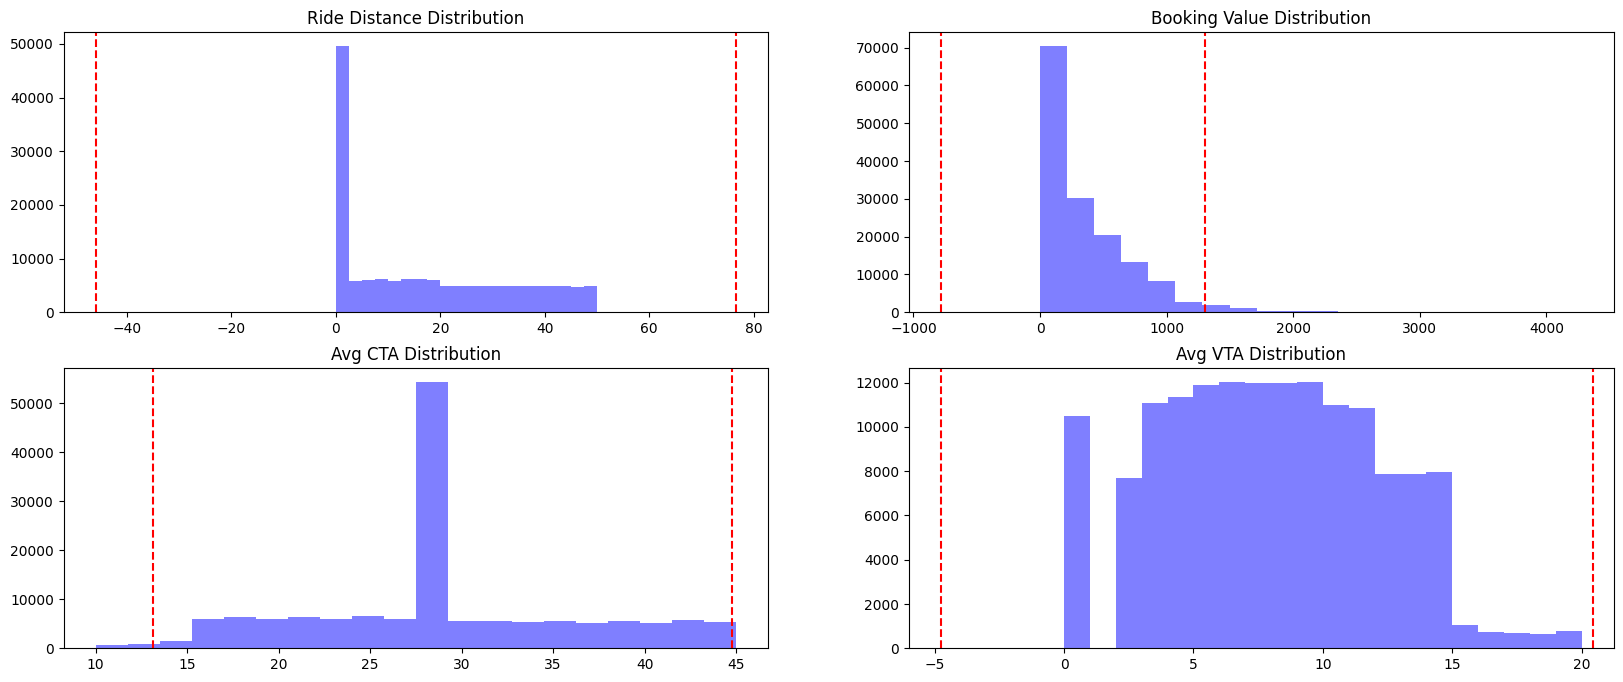

In [ ]:
# avg_vta
q1_avg_vta = df['avg_vta'].quantile(0.25)
q3_avg_vta = df['avg_vta'].quantile(0.75)
iqr_avg_vta = q3_avg_vta - q1_avg_vta

lower_bound_avg_vta = q1_avg_vta - 1.5 * iqr_avg_vta
upper_bound_avg_vta = q3_avg_vta + 1.5 * iqr_avg_vta

# avg_cta
q1_avg_cta = df['avg_cta'].quantile(0.25)
q3_avg_cta = df['avg_cta'].quantile(0.75)
iqr_avg_cta = q3_avg_cta - q1_avg_cta

lower_bound_avg_cta = q1_avg_cta - 1.5 * iqr_avg_cta
upper_bound_avg_cta = q3_avg_cta + 1.5 * iqr_avg_cta

# booking_value
q1_booking_value = df['booking_value'].quantile(0.25)
q3_booking_value = df['booking_value'].quantile(0.75)
iqr_booking_value = q3_booking_value - q1_booking_value

lower_bound_booking_value = q1_booking_value - 1.5 * iqr_booking_value
upper_bound_booking_value = q3_booking_value + 1.5 * iqr_booking_value

# ride_distance
q1_ride_distance = df['ride_distance'].quantile(0.25)
q3_ride_distance = df['ride_distance'].quantile(0.75)
iqr_ride_distance = q3_ride_distance - q1_ride_distance

lower_bound_ride_distance = q1_ride_distance - 1.5 * iqr_ride_distance
upper_bound_ride_distance = q3_ride_distance + 1.5 * iqr_ride_distance

# histogram
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.hist(df['ride_distance'], bins=20, color='blue', alpha=0.5)
plt.title('Ride Distance Distribution')
plt.axvline(x=lower_bound_ride_distance, color='red', linestyle='--')
plt.axvline(x=upper_bound_ride_distance, color='red', linestyle='--')

plt.subplot(2,2,2)
plt.hist(df['booking_value'], bins=20, color='blue', alpha=0.5)
plt.title('Booking Value Distribution')
plt.axvline(x=lower_bound_booking_value, color='red', linestyle='--')
plt.axvline(x=upper_bound_booking_value, color='red', linestyle='--')

plt.subplot(2,2,3)
plt.hist(df['avg_cta'], bins=20, color='blue', alpha=0.5)
plt.title('Avg CTA Distribution')
plt.axvline(x=lower_bound_avg_cta, color='red', linestyle='--')
plt.axvline(x=upper_bound_avg_cta, color='red', linestyle='--')

plt.subplot(2,2,4)
plt.hist(df['avg_vta'], bins=20, color='blue', alpha=0.5)
plt.title('Avg VTA Distribution')
plt.axvline(x=lower_bound_avg_vta, color='red', linestyle='--')
plt.axvline(x=upper_bound_avg_vta, color='red', linestyle='--')


In [ ]:
# Remove outlier
cond1 = df['ride_distance'] < upper_bound_ride_distance
cond2 = df['ride_distance'] > lower_bound_ride_distance

cond3 = df['booking_value'] < upper_bound_booking_value
cond4 = df['booking_value'] > lower_bound_booking_value

cond5 = df['avg_cta'] < upper_bound_avg_cta
cond6 = df['avg_cta'] > lower_bound_avg_cta

cond7 = df['avg_vta'] < upper_bound_avg_vta
cond8 = df['avg_vta'] > lower_bound_avg_vta

df = df[cond1 & cond2 & cond3 & cond4 & cond5 & cond6 & cond7 & cond8]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143786 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          143786 non-null  datetime64[ns]
 1   booking_id                    143786 non-null  string        
 2   booking_status                143786 non-null  category      
 3   customer_id                   143786 non-null  string        
 4   vehicle_type                  143786 non-null  category      
 5   pickup_location               143786 non-null  category      
 6   drop_location                 143786 non-null  category      
 7   avg_vta                       143786 non-null  float64       
 8   avg_cta                       143786 non-null  float64       
 9   customer_cancelled_rides      143786 non-null  int64         
 10  customer_cancellation_reason  143786 non-null  category      
 11  driver_cancelled_r

#Correlation Calculation

**Answering the question:** What factors might correlate with the ```Completed Rides```?





*   Assessing various numeric factors as: Ride Distance, Driver Ratings, Customer Rating, Avg VTAT, Avg CTAT




In [ ]:
df['is_completed'] = (df['booking_status'] == 'Completed').astype('int')
display(df.head())

,date,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vta,avg_cta,customer_cancelled_rides,...,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method,datetime,is_completed
0,2024-03-23,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,0.0,29.149636,0,...,Unstated,0,Unknown,0.0,0.00,not rated,not rated,UPI,2024-03-23 12:29:38,0
1,2024-11-29,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.000000,0,...,Unstated,1,Vehicle Breakdown,237.0,5.73,not rated,not rated,UPI,2024-11-29 18:01:39,0
2,2024-08-23,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.800000,0,...,Unstated,0,Unknown,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10,1
3,2024-10-21,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.500000,0,...,Unstated,0,Unknown,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25,1
4,2024-09-16,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.600000,0,...,Unstated,0,Unknown,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00,1


###1.Build correlation matrix

In [ ]:
corr_cols = ['avg_vta',
             'avg_cta',
             'booking_value',
             'ride_distance',
             'is_completed'
            ]
corr_matrix = df[corr_cols].corr()
corr_matrix

,avg_vta,avg_cta,booking_value,ride_distance,is_completed
avg_vta,1.000000,0.035260,0.105158,0.135493,0.192041
avg_cta,0.035260,1.000000,0.006600,0.059036,0.121188
booking_value,0.105158,0.006600,1.000000,0.487779,0.607751
ride_distance,0.135493,0.059036,0.487779,1.000000,0.732167
is_completed,0.192041,0.121188,0.607751,0.732167,1.000000


###2.Plot heatmap for correlation matrix

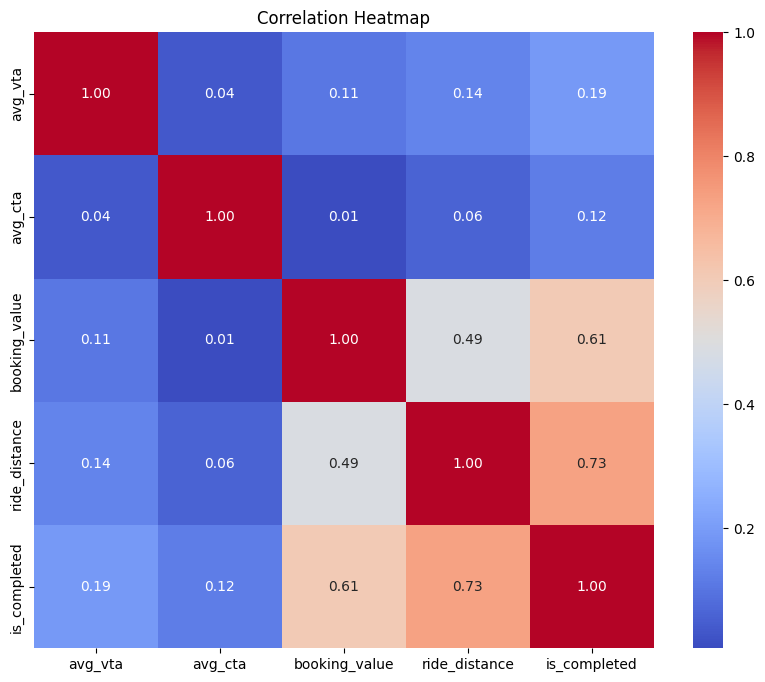

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Build Simple Linear Regression Model

##1.Fit the Model

Build a simple linear regression model, we can predict the likelihood of a ride being completed based on numeric factor.

In [ ]:
# Import models library
import statsmodels.api as sm

# Get features and target
X = df[['avg_vta']]
y = df['is_completed']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           is_completed   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     5506.
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:53:47   Log-Likelihood:                -97707.
No. Observations:              143786   AIC:                         1.954e+05
Df Residuals:                  143784   BIC:                         1.954e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4429      0.003    167.387      0.0

#Summary and Conclusion


Based on the analysis of the correlation matrix, we can conclude that there are strong correlation between ```booking_values``` and ```is_completed``` (0.61) & ```ride_distance``` and ```is_completed``` (0.73).

Booking value and ride distance are the most influential positive predictors of ride completion among the numerical features. These findings suggest that the characteristics of the ride itself (fare and distance) are strong indicators of completion.

However, the three variables ```avg_cta```, ```ride_distance```, ```booking_value``` only appeared after the ride had been completed, so I did not add them in the prediction model as predictors.

And, the summary of the logistic regression model shows that it is insufficient to predict the likelihood of completed ride based on solely one indication ```avg_vta```. The R-Squared is only 0.037, which is very weak to explain the completion of a ride.

#Visualization and Insight analysis

### Feature Engineering


Extract Season , Year , Month , Day , Weekday

In [ ]:
# Create year, month, day columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name().astype('category')
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name().astype('category')

# Create season column
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season).astype('category')


# Create time_of_day columns
def get_time_of_day(hour):
    if hour >= 0 and hour < 6:
        return 'Night'
    elif hour >= 6 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_of_day'] = df['datetime'].dt.hour.apply(get_time_of_day).astype('category')


df.head()

,date,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vta,avg_cta,customer_cancelled_rides,...,customer_rating,payment_method,datetime,is_completed,year,month,day,weekday,season,time_of_day
0,2024-03-23,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,0.0,29.149636,0,...,not rated,UPI,2024-03-23 12:29:38,0,2024,March,23,Saturday,Spring,Afternoon
1,2024-11-29,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.000000,0,...,not rated,UPI,2024-11-29 18:01:39,0,2024,November,29,Friday,Fall,Evening
2,2024-08-23,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.800000,0,...,4.9,Debit Card,2024-08-23 08:56:10,1,2024,August,23,Friday,Summer,Morning
3,2024-10-21,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.500000,0,...,5.0,UPI,2024-10-21 17:17:25,1,2024,October,21,Monday,Fall,Afternoon
4,2024-09-16,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.600000,0,...,4.3,UPI,2024-09-16 22:08:00,1,2024,September,16,Monday,Fall,Evening


In [ ]:
# Route
df['route'] = df['pickup_location'].astype(str) + ' to ' + df['drop_location'].astype(str)


In [ ]:
# Dataframe with route and booking id
route_df = df[['route', 'booking_id']]

# Export data to CSV for BI analysis

In [ ]:
df.to_csv('uber_analytic_data.csv', index=False)



1.   Optimize Ride Failure Rate
*   Focus on Driver-Side Cancellation: Implement a robust system to monitor, audit, and penalize drivers who repeatedly cancel rides. Since driver reasons are evenly split, a comprehensive approach addressing all categories (customer relation, personal, and operational) is required.
*   Address Vehicle Reliability: Given that 'Vehicle Breakdown' accounts for a third of incomplete rides, enforce enhanced maintenance and support protocols for all drivers to ensure fleet reliability.
*   Enhance Driver Assignment: Boost operational resources and recruitment to reduce the $7.30\%$ of rides where 'No Driver Found' and to mitigate driver unwillingness to accept requests16
2.   Stabilize Revenue and Payment Methods
*   Investigate Revenue Dip: Conduct a deep dive to analyze the severe revenue drop experienced in February to identify its root cause (e.g., market event, platform issue, competition) and develop preventative strategies for future stability.
*   Secure UPI Channel: Ensure maximum security and stability for the UPI payment gateway, recognizing its role as the most critical revenue channel.

*   Promote Uber Wallet: Launch an introduction campaign or promotion to increase the usage of 'Uber Wallet' to regain ground lost to UPI and Cash payments.





